<a href="https://colab.research.google.com/github/leviLR/Networkx/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de redes con NetworkX
Tutorial básico sobre la librería **NetworkX** en Python.

En este cuaderno aprenderás:
- Qué es NetworkX
- Cómo crear grafos
- Cómo agregar nodos y aristas
- Cómo visualizar grafos
- Algunas métricas de redes (grados, caminos, centralidad)

In [3]:
!pip install networkx matplotlib

## 1. ¿Qué es NetworkX?
NetworkX es una librería de Python que nos permite crear, analizar y visualizar **redes y grafos**.
Un **grafo** es un conjunto de **nodos** (puntos) conectados por **aristas** (líneas).

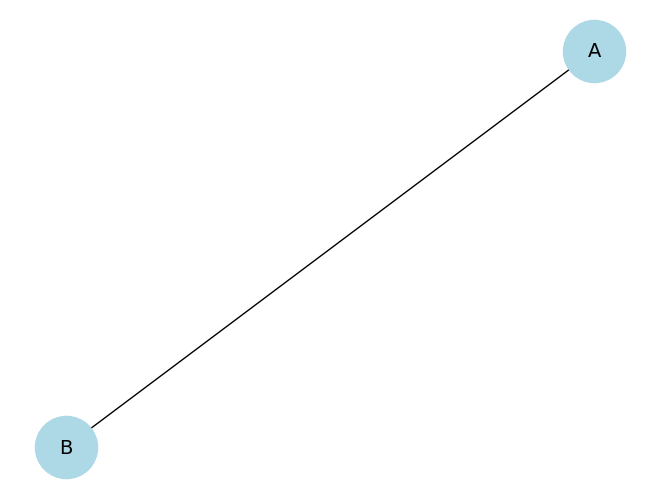

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos
G.add_node("A")
G.add_node("B")

# Agregar una arista
G.add_edge("A", "B")

# Dibujar el grafo
nx.draw(G, with_labels=True, node_color="lightblue", node_size=2000, font_size=14)
plt.show()

## 2. Agregar más nodos y aristas
Podemos crear redes más grandes fácilmente.fácilmente.a

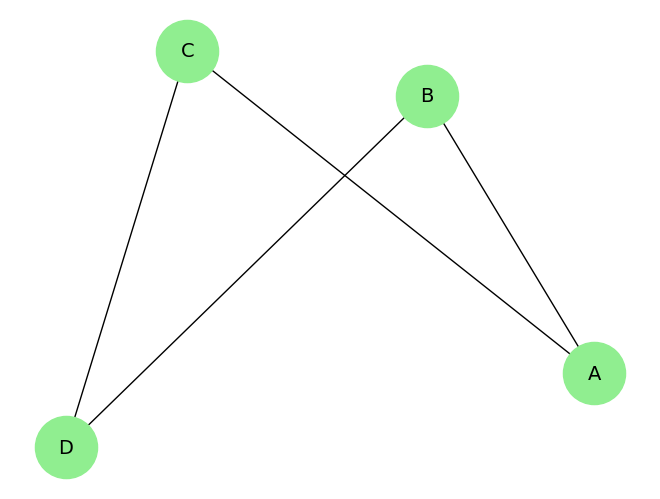

In [5]:
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D"])
G.add_edges_from([("A","B"),("A","C"),("B","D"),("C","D")])

nx.draw(G, with_labels=True, node_color="lightgreen", node_size=2000, font_size=14)
plt.show()

## 3. Medidas básicas
Podemos obtener información de la red como:
- Grado de cada nodo (cuántas conexiones tiene).
- Camino más corto entre nodos.

In [6]:
# Grado de cada nodo
print("Grados de los nodos:", dict(G.degree()))

# Camino más corto entre A y D
print("Camino más corto entre A y D:", nx.shortest_path(G, "A", "D"))

Grados de los nodos: {'A': 2, 'B': 2, 'C': 2, 'D': 2}
Camino más corto entre A y D: ['A', 'B', 'D']


## 4. Ejemplo de red aleatoria
Podemos generar redes automáticamente con modelos matemáticos.

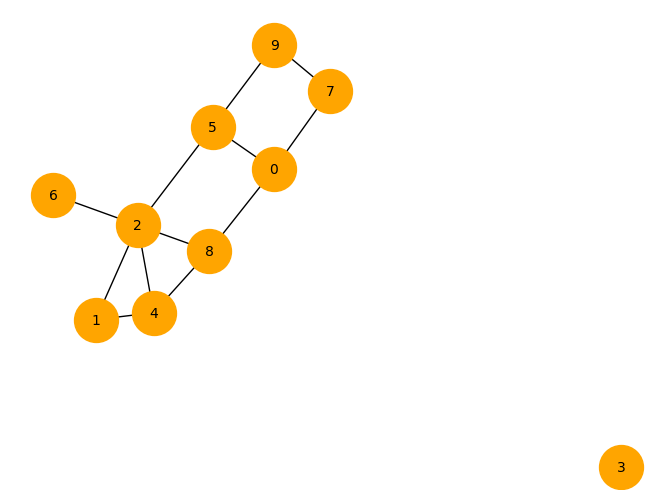

In [7]:
# Red aleatoria con 10 nodos y probabilidad de conexión 0.3
G_random = nx.erdos_renyi_graph(10, 0.3)

nx.draw(G_random, with_labels=True, node_color="orange", node_size=1000, font_size=10)
plt.show()

##Árbol de Expansión

Un árbol de expansión mínima conecta todos los nodos de un grafo con el menor costo posible (sumando los pesos de las aristas). Se usa, por ejemplo, en diseño de redes de internet o electricidad para ahorrar material.

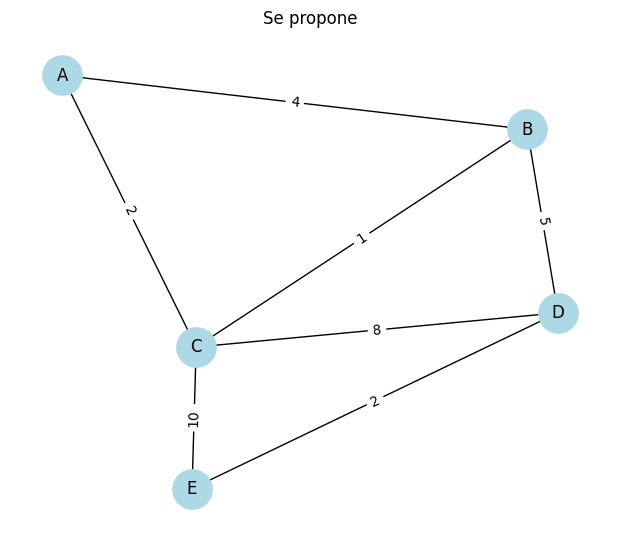

Aristas del árbol de expansión mínima: [('A', 'C', {'weight': 2}), ('B', 'C', {'weight': 1}), ('B', 'D', {'weight': 5}), ('D', 'E', {'weight': 2})]


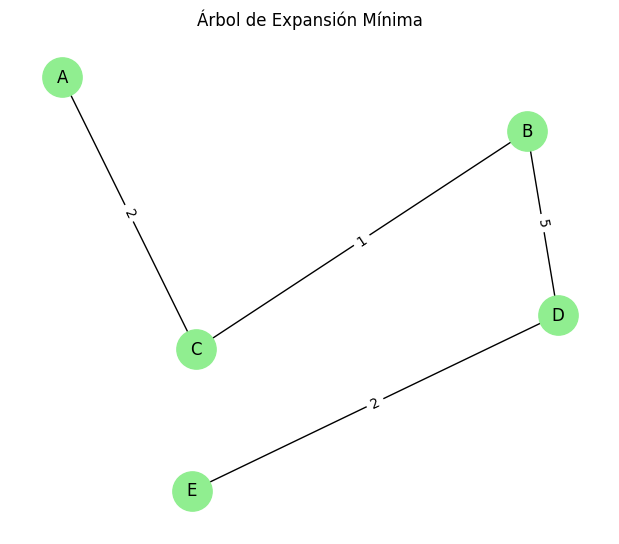

In [10]:
# Creamos un grafo
G = nx.Graph()
G.add_weighted_edges_from([
    ("A", "B", 4),
        ("A", "C", 2),
            ("B", "C", 1),
                ("B", "D", 5),
                    ("C", "D", 8),
                        ("C", "E", 10),
                            ("D", "E", 2),
                            ])

# Dibujamos la red principal
pos = nx.spring_layout(G, seed=42)
labels = nx.get_edge_attributes(G, "weight")
plt.figure(figsize=(6,5))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Se propone")
plt.show()

# Calculamos el árbol de expansión mínima
mst = nx.minimum_spanning_tree(G, weight="weight")
print("Aristas del árbol de expansión mínima:", list(mst.edges(data=True)))

# Dibujamos el MST
plt.figure(figsize=(6,5))
nx.draw(mst, pos, with_labels=True, node_color="lightgreen", node_size=800)
nx.draw_networkx_edge_labels(mst, pos, edge_labels=nx.get_edge_attributes(mst,"weight"))
plt.title("Árbol de Expansión Mínima")
plt.show()

##Ruta más corta
La ruta más corta encuentra el camino con menor distancia entre dos nodos. Se usa en mapas (tipo Google Maps) o en logística.

Ruta más corta de A a E: ['A', 'C', 'B', 'D', 'E'] (longitud total = 10)


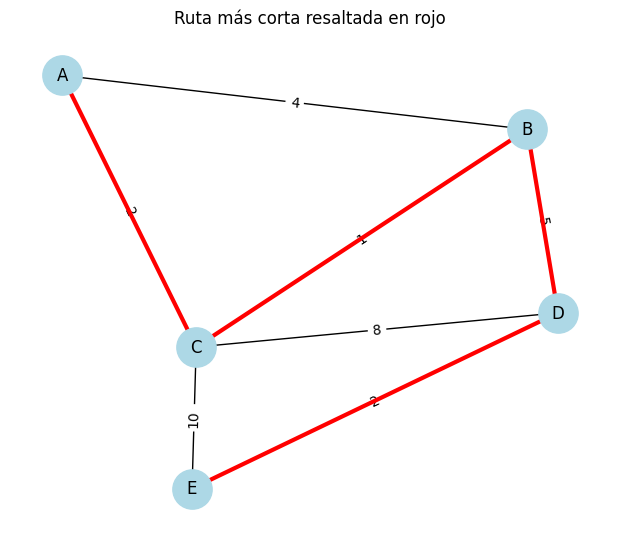

In [9]:
# usaremos los nodos anteriores
source, target = "A", "E"

# Ruta más corta
path = nx.shortest_path(G, source=source, target=target, weight="weight")
length = nx.shortest_path_length(G, source=source, target=target, weight="weight")

print(f"Ruta más corta de {source} a {target}: {path} (longitud total = {length})")

# Dibujamos la ruta
path_edges = list(zip(path, path[1:]))
plt.figure(figsize=(6,5))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=3)
plt.title("Ruta más corta resaltada en rojo")
plt.show()

##Flujo máxima

El flujo máximo se usa cuando queremos mandar la mayor cantidad posible de algo (agua, tráfico, datos, etc.) desde un nodo origen hasta un destino. NetworkX usa el algoritmo de Edmonds-Karp por debajo.

## Conclusión
En este tutorial aprendimos lo básico de **NetworkX**:
- Crear grafos.
- Agregar nodos y aristas.
- Visualizar redes.
- Calcular métricas simples.
- Generar redes aleatorias.

Esto es solo una introducción, pero con NetworkX se pueden hacer análisis avanzados de redes sociales, biológicas y más.